In [150]:
!pip install --upgrade arabic-reshaper
!pip install transformers
!pip install datasets

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [151]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.stem import ISRIStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

from arabic_reshaper import reshape
from bidi.algorithm import get_display

from datasets import Dataset, DatasetDict
from transformers import AutoModelForSequenceClassification, AutoTokenizer

In [152]:
# Preprocess Arabic text
def preprocess_arabic_text(text):
    # Remove non-Arabic characters
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
    return text

In [153]:
df = pd.read_csv('/kaggle/input/hespress/stories_art-et-culture.csv', encoding='utf-8')

In [154]:
df.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture


In [155]:
print(df.columns)

Index(['Unnamed: 0', 'id', 'title', 'date', 'author', 'story', 'topic'], dtype='object')


In [156]:
# Apply preprocessing to the 'story' column
def apply_preprocessing(df):
    df['story'] = df['story'].apply(preprocess_arabic_text)
    df['input'] = 'TEXT1: ' + df.title + '; TEXT2: ' + df.author + '; ANC1: ' + df.story
    return df

In [157]:
# Convert the pandas DataFrame to a Hugging Face Dataset
def convert_to_dataset(df):
    ds = Dataset.from_pandas(df)
    return ds

In [158]:
# Tokenize the input data using the tokenizer
def tokenize_data(ds, tokenizer):
    tokenized_ds = ds.map(lambda x: tokenizer(x["input"]), batched=True)
    return tokenized_ds

In [159]:
# Split the dataset into training and test sets
def split_dataset(tokenized_ds, test_size=0.2, random_state=42):
    train_data, test_data = train_test_split(tokenized_ds, test_size=test_size, random_state=random_state)
    return train_data, test_data

In [160]:
# Visualize the sizes of the training and test sets
def visualize_dataset_sizes(train_data, test_data):
    train_size = len(train_data)
    test_size = len(test_data)

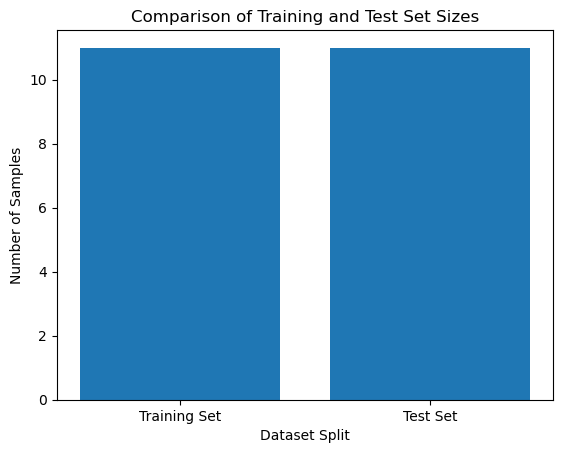

In [161]:
    plt.bar(['Training Set', 'Test Set'], [train_size, test_size])
    plt.xlabel('Dataset Split')
    plt.ylabel('Number of Samples')
    plt.title('Comparison of Training and Test Set Sizes')
    plt.show()

In [162]:
# Load the model and tokenizer
def load_model_and_tokenizer(model_name):
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    return model, tokenizer

In [163]:
# Main code logic
def main():
# File path of the dataset
   file_path = '/kaggle/input/hespress/stories_art-et-culture.csv'

In [165]:
# Apply preprocessing to the dataset
df = apply_preprocessing(df)

# Convert the DataFrame to a Hugging Face Dataset
ds = convert_to_dataset(df)


In [166]:
# Load the model and tokenizer
model_name = 'microsoft/deberta-v3-small'
model, tokenizer = load_model_and_tokenizer(model_name)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['mask_predictions.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.weight', 'mask_predictions.dense.weight', 'mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.dense.bias', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

In [167]:
    # Tokenize the input data
    tokenized_ds = tokenize_data(ds, tokenizer)

    # Split the dataset into training and test sets
    train_data, test_data = split_dataset(tokenized_ds)

    # Visualize the sizes of the training and test sets
    visualize_dataset_sizes(train_data, test_data)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [168]:
# Print the input of the first row in the tokenized dataset
row = tokenized_ds[0]
print(row['input'])

if __name__ == "__main__":
    main()

TEXT1: "بيت الشعر" يسائل وزير الثقافة عن كوابيس سوداء; TEXT2: هسبريس من الرباط; ANC1: وجه بيت الشعر في المغرب إلى وزير الثقافة والشباب والرياضة رسالة موسومة بـلماذا تحولت أحلام بيضاء إلى كوابيس سوداء؟، أشار من خلالها إلى أن بيت الشعر تأسّس سنة  بهدف تحقيق جُملة من الأهداف التي تروم جميعُها تعزيز مكانة الشّعر في المجتمع والحياة وترسيخ مكانته بين الناس كحاملٍ لقيم الحلم والخيال؛ فمن تلك الأهداف توطين الشعر المغربي في المقررات الدراسية وتشجيع التلاميذ والطلبة على قراءته وتذوّق جمالياته، خاصّة في اللحظة التي ينتصرُ فيها لكل ما هو مدهش وإنسانيوجاء في الرسالة، التي توصلت هسبريس بنسخة منها، أن بيت الشعر نجح في المغرب خلال مسيرته الطويلة التي تمتدّ على مدى ربع قرن في إقناع المنظمة العالمية للتربية والثقافة والعلوم اليونيسكو بإحداث يوم عالمي للشعر عن طريق المقترح الذي تقدّم به، والذي تبنته الحكومة المغربية في عهد الراحل عبد الرحمان اليوسفي، كما نجح في ضمان مكانة عالمية لجائزته الشعرية المعروفة الأركانة التي صار شعراء العالم يتطلعون للفوز بها، علاوة على انتظام منشوراته الشعرية ومجلته الرصينة الب